In [23]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
# Load dataset
df = pd.read_csv("data/StudentsPerformance.csv")

In [7]:
# 5 Records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Prepare X, Y variables
X = df.drop(columns=['math score'], axis=1)

In [10]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y = df['math score']

In [12]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [14]:
# Column Transformer: 3 types
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)


In [15]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [18]:
# partition into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape

((800, 19), (200, 19))

In [19]:
# Evaluation function to give all metrics
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(Xtrain, ytrain) 

    #Make predictions
    ytrain_pred = model.predict(Xtrain)
    ytest_pred = model.predict(Xtest)

    # Evaluate Train and Test models
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Root Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------------")

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Root Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")


LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3271
- Root Absolute Error: 4.2694
- R2 Score: 0.8741
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4186
- Root Absolute Error: 4.2195
- R2 Score: 0.8793


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Root Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Root Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Root Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Root Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Root Absolute Error: 4.5167
- R2 Score: 0.8555
------

Results

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879342
5,Random Forest Regressor,0.853454
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.844347
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.763169


Linear Regression

In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(Xtrain, ytrain)
ypred = lin_model.predict(Xtest)
score = r2_score(ytest, ypred) * 100
print("The accuracy of the model is %.2f" % score)

The accuracy of the model is 87.93


Text(0, 0.5, 'Predicted')

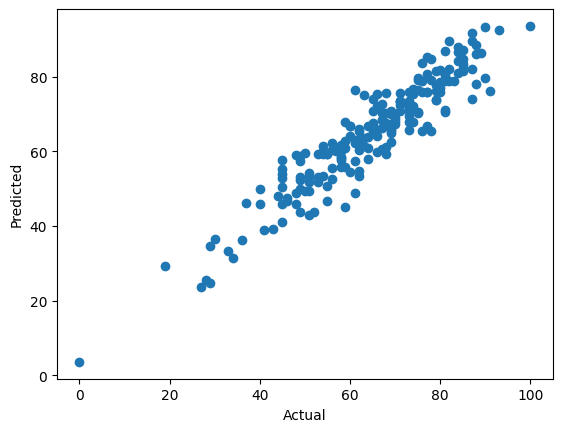

In [31]:
#Plot ypred and ytest
plt.scatter(ytest, ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

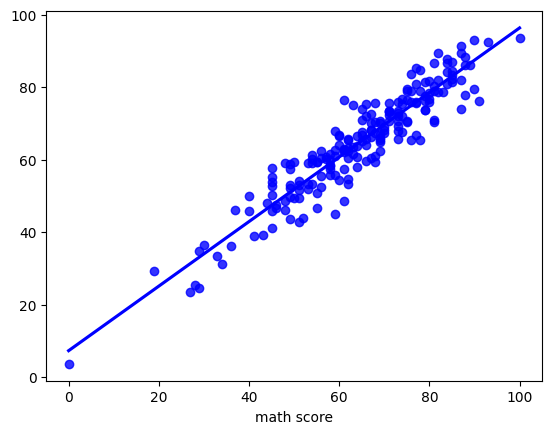

In [33]:
sns.regplot(x=ytest, y=ypred, ci=None, color='blue')

In [34]:
# Difference between actual and predicted values
pred_df = pd.DataFrame({
    "Actual Value": ytest,
    "Predicted": ypred,
    "Difference": ytest-ypred
})
pred_df

,Actual Value,Predicted,Difference
521,91,76.21875,14.78125
737,53,59.21875,-6.21875
740,80,76.90625,3.09375
660,74,76.71875,-2.71875
411,84,87.90625,-3.90625
...,...,...,...
408,52,43.81250,8.18750
332,62,62.40625,-0.40625
208,74,67.75000,6.25000
613,65,66.81250,-1.81250
